17/05/2023 au 25/05/2023    
objectif : faire la comparaison avec et sans contexte des performances du système d'entity linking de SpaCy   
contexte : notebook présenté lors de la réunion du 25/05/2023

# Evaluation comparative  du système d'entity linking de SpaCy

## code donné par CKP

In [14]:
texte = lire_fichier(path)
text=nlp(texte)  
for ent in text.ents:
        list_resultats.append([ent.text, ent.start_char, ent.end_char, ent.label_,texte[ent.start_char-200:ent.start_char],texte[ent.end_char:ent.end_char+200]])

## première adaptation

In [3]:
import glob
import spacy
import json


def lire_fichier(chemin):
    with open (chemin, "r", encoding="utf-8") as fichier:
        texte=fichier.read()
        return texte

list_resultats=[]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"




for path in glob.glob(path_corpora):
    texte = lire_fichier(path)
    nlp = spacy.load("fr_core_news_sm")
    nlp.add_pipe("entityLinker", last=True)
    text=nlp(texte) 
    list_resultats=[]
    for ent in text.ents:
        list_resultats.append([ent.text, ent.start_char, ent.end_char, ent.label_,texte[ent.start_char-200:ent.start_char],ent.text,texte[ent.end_char:ent.end_char+200]])
print (list_resultats[0])
print (list_resultats[70])

['Norine Duclos', 76, 89, 'PER', '', " qu'ont\nlieu les plus egayantes veilles de notre vil-\nlage. Adonc, certain soir, comme j'entrais\nchez Norine, je la trouvai en train de precher\nses trois petiotes.\n- He MIandine, criait-elle, dpeche-t"]
['petiot\nRoux', 5007, 5018, 'PER', "t Jean-Claude;\nle dragon viendra pendant ce temps-la.\n- Je veux, au contraire, l'attendre pour\nchanter, dit la Rose d'un ton pique.\n- Chante, dit Gaspard, ou sinon...\n-- Tu deviens par trop bravache, ", ', dit Norine; tache un peu de te tenir\ntranquille.\n- Je vas chanter, moi, dit le vieux berger.l-\nMION VI1LAGE.\n- lEn ce cas-la, je me sauve, dit la petiote\nh Perpetue.\n- Non, dit le fieu de Toinon, so']


Nous vérifions ensuite dans le texte si nous retrouvons bien les mêmes valeurs

"Depuis un nombre innombrable d’hivers, c’est dans la maison de Norine Duclos qu’ont lieu les plus égayantes veillées de notre village. Adonc, certain soir, comme j’entrais chez Norine, je la trouvai en train de prêcher ses trois petiotes. "

"- Chante, toi, la Rose, dit Jean-Claude;
le dragon viendra pendant ce temps-la.
- Je veux, au contraire, l'attendre pour
chanter, dit la Rose d'un ton pique.
- Chante, dit Gaspard, ou sinon...
-- Tu deviens par trop bravache, petiot
Roux, dit Norine; tache un peu de te tenir
tranquille.
- Je vas chanter, moi, dit le vieux berger.l-
MION VI1LAGE.
- lEn ce cas-la, je me sauve, dit la petiote
h Perpetue."

### concaténation

In [6]:
import glob
import spacy
import json


def lire_fichier(chemin):
    with open (chemin, "r", encoding="utf-8") as fichier:
        texte=fichier.read()
        return texte

list_resultats=[]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"

for path in glob.glob(path_corpora):
    texte = lire_fichier(path)
    nlp = spacy.load("fr_core_news_sm")
    nlp.add_pipe("entityLinker", last=True)
    text=nlp(texte) 
    list_resultats=[]
    for ent in text.ents:
        contexte = str(texte[ent.start_char-100:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+100])
        list_resultats.append([ent.text, ent.start_char, ent.end_char, ent.label_,contexte])
print (list_resultats[0])
print (list_resultats[70])

['Norine Duclos', 76, 89, 'PER', "Norine Duclos qu'ont\nlieu les plus egayantes veilles de notre vil-\nlage. Adonc, certain soir, comme j'entrais\nche"]
['petiot\nRoux', 5007, 5018, 'PER', "er, dit la Rose d'un ton pique.\n- Chante, dit Gaspard, ou sinon...\n-- Tu deviens par trop bravache, petiot\nRoux, dit Norine; tache un peu de te tenir\ntranquille.\n- Je vas chanter, moi, dit le vieux berger.l-\nMIO"]


## Essai d'incorporation dans le code existant

==> échec

In [30]:
import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open (chemin, "r", encoding="utf-8") as fichier:
        texte=fichier.read()
        return texte
def stocker(chemin, contenu):
    w =open(chemin, "w")
    w.write(json.dumps(contenu , indent = 2))
    w.close()
#modele=["sm","md","lg"]
modele=["md"]
# path_corpora = "../DATA/ELTeC-Fra_2023/*/*/*/*.txt"
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"
for mod in modele:
    print("Pour le modèle : ",mod,"\n")
    # nlp = spacy.load("en_core_web_%s"%mod)
    nlp = spacy.load("fr_core_news_%s"%mod)
    nlp.add_pipe("entityLinker", last=True)
    
    
    for path in glob.glob(path_corpora):
        print("Entrée : ",path)
        txt=lire_fichier(path)
        doc = nlp(txt[50])  
        #doc = nlp(txt) 
        i=0
        dico_sent_tok ={}
        
        
        for ent in doc._.linkedEntities: 
                ide = "ID"+str(i)
                url_00 = ent.get_url()
                label_00=ent.get_label()
                description=ent.get_description()
                span_00=ent.get_span()
                span_oo=str(span_00)
                doc2=nlp(span_oo)
                for ent in doc2.ents:#Pour le typage avec les labels de l'entity linking
                    
                    # print(en.label_)
                    dico_sent_tok[ide]={}
                    dico_sent_tok[ide]["url"]=url_00
                    dico_sent_tok[ide]["span"]=span_oo
                    dico_sent_tok[ide]["label"]=label_00
                    dico_sent_tok[ide]["description"]=description
                    dico_sent_tok[ide]["type"]=ent.label_#Pour le typage avec les labels de l'entity linking
                    #dico_sent_tok[ide]["contexte"]=doc[ent.start_char-200:ent.start_char],doc[ent.end_char:ent.end_char+200]
                    i+=1
                    print(dico_sent_tok[ide]) 
        
            

Pour le modèle :  md 

Entrée :  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt


In [ ]:
==> impossible

## enregistrer les valeurs avec leur contexte dans un dictionnaire

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 11:59:44 2023

@author: antonomaz
"""

import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        dico = {}
        i = 1

        for ent in doc.ents:
            deb_contexte = str(doc[max(ent.start_char - 200, 0):ent.start_char])
            fin_contexte = str(doc[ent.end_char:min(ent.end_char + 200, len(doc))])
            contexte = str(texte[ent.start_char-200:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+200])
            ide = "ID" + str(i)
            dico[ide] = {
                "texte": ent.text,
                "char_start": ent.start_char,
                "char_end": ent.end_char,
                "label": ent.label_,
                "contexte": contexte,
            }
            i += 1
        print (dico)
            

Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
{'ID1': {'texte': 'VEILLÉE', 'char_start': 4, 'char_end': 11, 'label': 'MISC', 'contexte': "VEILLÉE. \nDepuis un nombre innombrable d'hivers, c'est dans la maison de Norine Duclos qu'ont lieu les plus égayantes veillées de notre village. Adonc, certain soir, comme j'entrais chez Norine, je la trouva"}, 'ID2': {'texte': 'Norine Duclos', 'char_start': 77, 'char_end': 90, 'label': 'PER', 'contexte': "Norine Duclos qu'ont lieu les plus égayantes veillées de notre village. Adonc, certain soir, comme j'entrais chez Norine, je la trouvai en train de prêcher ses trois petiotes. \n— Hé ! Mandine, criait-elle, dépêche"}, 'ID3': {'texte': 'Norine', 'char_start': 191, 'char_end': 197, 'label': 'LOC', 'contexte': "Norine, je la trouvai en train de prêcher ses trois petiotes. \n— Hé ! Mandine, criait-elle, dépêche-toi de balayer la maison ; plus vite que ça ! Surtout n'oublie pas le coin où la femme

In [11]:
import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        dico = {}
        i = 1

        for ent in doc.ents:
            deb_contexte = str(doc[max(ent.start_char - 200, 0):ent.start_char])
            fin_contexte = str(doc[ent.end_char:min(ent.end_char + 200, len(doc))])
            context = deb_contexte + fin_contexte
            ide = "ID" + str(i)
            dico[ide] = {
                "texte": ent.text,
                "char_start": ent.start_char,
                "char_end": ent.end_char,
                "label": ent.label_,
                "contexte": context,
            }
            i += 1
            print(dico)
            for cle, valeur in dico.items():
                entourage = dico.get("contexte")
                entite = dico.get("texte")
                liste_entourage = []
                liste_entite = []
                liste_entite.append(entite)
                liste_entourage.append(entourage)
            for entourages in liste_entourage : 
                for ent in doc._.linkedEntities:
                    url_entourage = ent.get_url()
                    liste_url_entourage = []
                    liste_url_entourage.append[url_entourage]
            for entites in liste_entite : 
                for ent in doc._.linkedEntities:
                    url_entite = ent.get_url()
                    liste_url_entite= []
                    liste_url_entite.append[url_entite]
            
            if [c for c in liste_entourage if c in liste_url_entite] : 
                common_value = True
                
                
                    
                    
                
            

Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
{'ID1': {'texte': 'VEILLÉE', 'char_start': 4, 'char_end': 11, 'label': 'MISC', 'contexte': "UNE VEILLÉE. \nc'est dans la maison de Norine Duclos qu'ont lieu les plus égayantes veillées de notre village. Adonc, certain soir, comme j'entrais chez Norine, je la trouvai en train de prêcher ses trois petiotes. \n— Hé ! Mandine, criait-elle, dépêche-toi de balayer la maison ; plus vite que ça ! Surtout n'oublie pas le coin où la femme de Jean-Claude a épluché une pomme ce matin. Toi, la Rose, prends mon couvet et emplis-le. Habile [2] , habile. \nDésirée ! Monte sur l'escabeau et décroche une chandelle à la poutre ; trouve le chandelier. Bon ! voilà du cuivre qui terluit comme le dos d'une citrouille. Frotte, frotte ; là !... Faites excuse, Cellier, dit Norine, mais des fillettes, ça ne s'avise de rien, il faut tout leur commander. \nQuand on doit parler d'une ménagère, en voilà une ! Elle p

TypeError: 'builtin_function_or_method' object is not subscriptable

In [ ]:
import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        dico = {}
        i = 1

        for ent in doc.ents:
            deb_contexte = str(doc[max(ent.start_char - 200, 0):ent.start_char])
            fin_contexte = str(doc[ent.end_char:min(ent.end_char + 200, len(doc))])
            context = deb_contexte + fin_contexte
            ide = "ID" + str(i)
            dico[ide] = {
                "texte": ent.text,
                "char_start": ent.start_char,
                "char_end": ent.end_char,
                "label": ent.label_,
                "contexte": context,
            }
            i += 1
            print(dico)

            # Move the following code outside the loop for proper variable scope
            liste_entourage = []
            liste_entite = []
            liste_url_entourage = []
            liste_url_entite = []

            for cle, valeur in dico.items():
                entourage = valeur["contexte"]
                entite = valeur["texte"]
                liste_entite.append(entite)
                liste_entourage.append(entourage)

            for ent in doc._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)

            for ent in doc._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)

            common_values = set(liste_entourage).intersection(liste_url_entite)


# générer un tableau et un graphique récapitulatif

In [ ]:
import glob
import spacy
import json
import pandas as pd
import matplotlib.pyplot as plt

def lire_fichier(chemin):
    with open(chemin) as json_data: 
        dist = json.load(json_data)
    return dist

def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)

path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

# Lists to store the results
common_urls_per_file = []
common_urls = []

# Loop through all files in the directory
for path in glob.glob(path_corpora):
    if "REN" in str(path):
        nlp = spacy.load("fr_core_news_lg")
        common_values = 0
        print(path)
        dictionnaires = lire_fichier(path)
        for cle, valeur in dictionnaires.items():
            liste_entourage = []
            liste_entite = []
            liste_url_entite = []
            liste_url_entourage = []
            entourage = valeur["contexte"]
            entite = valeur["texte"]
            liste_entite.append(entite)
            liste_entourage.append(entourage)
            nlp.add_pipe("entityLinker", last=True)
            doc = nlp(entourage[50000])
            doc2 = nlp(entite[50000])
            for ent in doc._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc2._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
            common_urls.extend(liste_url_entite)
            common_urls_per_file.append((path, set(liste_url_entite) & set(liste_url_entourage)))

# Summary table of common URLs
common_urls_table = pd.DataFrame(common_urls, columns=["Common URLs"])
print("Summary Table of Common URLs:")
print(common_urls_table)

# Graph of number of common URLs per JSON file
file_names = [file[0] for file in common_urls_per_file]
num_common_urls = [len(file[1]) for file in common_urls_per_file]

plt.figure(figsize=(12, 6))
plt.bar(file_names, num_common_urls)
plt.xlabel("JSON File")
plt.ylabel("Number of Common URLs")
plt.title("Number of Common URLs per JSON File")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 15:24:32 2023

@author: antonomaz
"""

import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        dico = {}
        i = 1

        for ent in doc.ents:
            deb_contexte = str(doc[max(ent.start_char - 10, 0):ent.start_char])
            fin_contexte = str(doc[ent.end_char:min(ent.end_char + 10, len(doc))])
            context = deb_contexte + fin_contexte
            ide = "ID" + str(i)
            print(ide)
            dico[ide] = {
                "texte": ent.text,
                "char_start": ent.start_char,
                "char_end": ent.end_char,
                "label": ent.label_,
                "debcontexte": doc[ent.start_char-10:ent.start_char],
                "fincontexte": doc[ent.end_char:ent.end_char+10],
            }
            i += 1
            print(dico)
            stocker("%s_NER_contexte.json"%path,dico)


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
ID1
{'ID1': {'texte': 'VEILLÉE', 'char_start': 4, 'char_end': 11, 'label': 'MISC', 'debcontexte': , 'fincontexte': c'est dans la maison de Norine Duclos qu'ont}}


TypeError: Object of type Span is not JSON serializable

## En enregistrant dans un dictionnaire

ça fait planter spyder systématiquement

In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 15:24:32 2023

@author: antonomaz
""" 

import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        i = 1
        dico={}
        for ent in doc.ents:
            #deb_contexte = str(doc[max(ent.start_char - 10, 0):ent.start_char])
            #fin_contexte = str(doc[ent.end_char:min(ent.end_char + 10, len(doc))])
            #context = deb_contexte + fin_contexte
            contexte = str(texte[ent.start_char-100:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+100])
            ide = "ID" + str(i)
            print(ide)
            #list_entites.append(ent.text)
            #resultat = str(doc[ent.start_char-50:ent.start_char])+ str(ent.text) + str(doc[ent.end_char:ent.end_char+50])
            #list_resultats.append(resultat)
            dico[ide]={}
            dico[ide]["texte"]= ent.text
            dico[ide]["char_start"]= ent.start_char
            dico[ide]["char_end"]= ent.end_char
            dico[ide]["label"]= ent.label_
            dico[ide]["contexte"]= contexte
            i += 1
            
            print(dico)
            #print(list_resultats)
            #stocker("%s_NER_contexte.json"%path,dico)


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## enregistrer dans une liste

In [20]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon May 22 15:24:32 2023

@author: antonomaz
""" 

import json
import spacy  # version 3.5
import glob


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/*.txt"

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    # Set up entity linker with knowledge base
    # Refer to Spacy documentation for entity linking setup

    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        i = 1
        dico={}
        for ent in doc.ents:dans
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            list_entites.append(ent.text)
            list_resultats.append(contexte)
            #print(list_entites)
            
            #stocker("%s_NER_contexte.json"%path,dico)


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt
Summary Table of Common URLs:
                                     Common URLs
0         https://www.wikidata.org/wiki/Q3646180
1        https://www.wikidata.org/wiki/Q21450529
2           https://www.wikidata.org/wiki/Q69546
3         https://www.wikidata.org/wiki/Q3646180
4        https://www.wikidata.org/wiki/Q21450529
...                                          ...
3518311   https://www.wikidata.org/wiki/Q1062645
3518312    https://www.wikidata.org/wiki/Q205006
3518313   https://www.wikidata.org/wiki/Q2479774
3518314    https://www.wikidata.org/wiki/Q205006
3518315    https://www.wikidata.org/wiki/Q205006

[3518316 rows x 1 columns]


/tmp/ipykernel_3714/1422842801.py:80: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


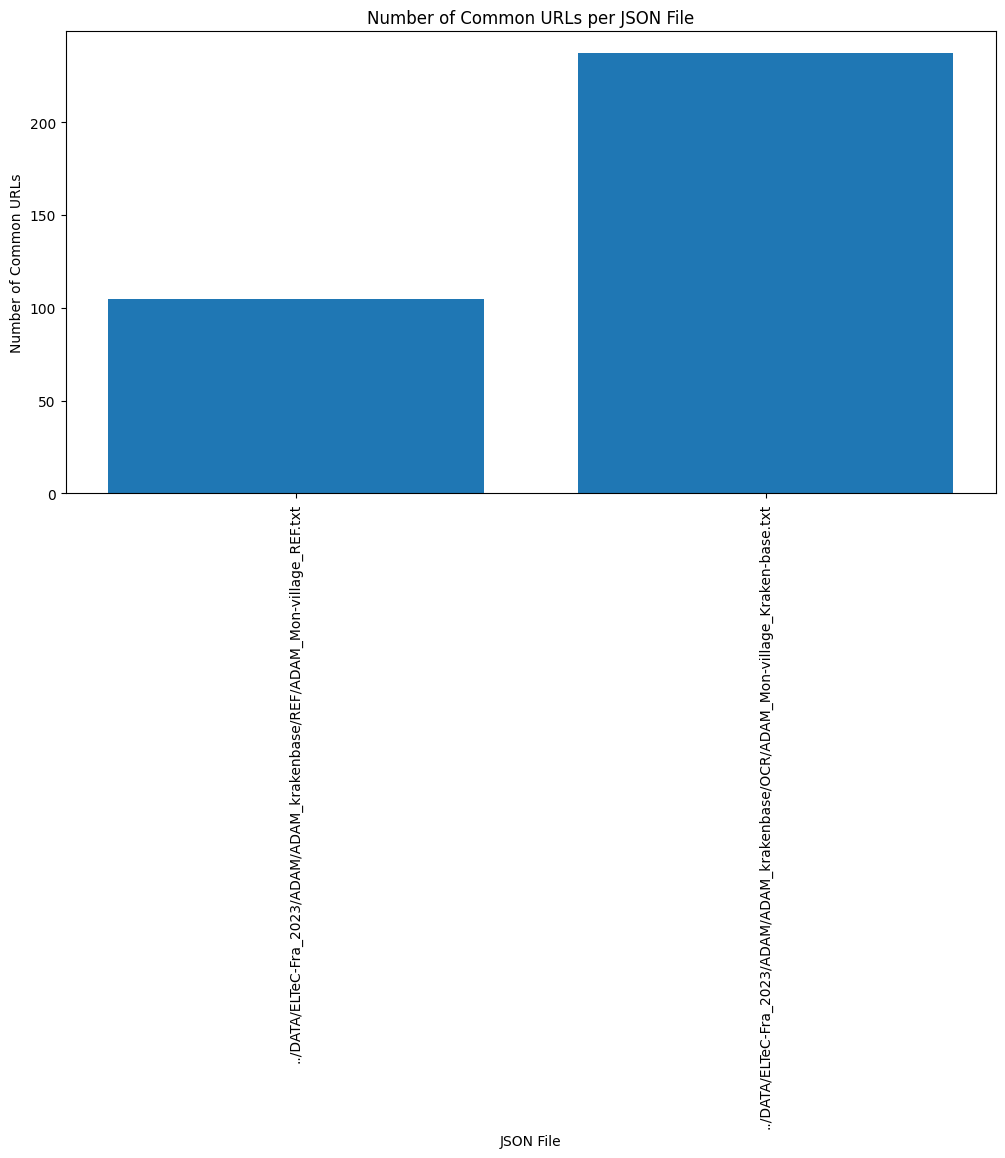

In [21]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 11:03:22 2023

@author: antonomaz
"""


import json
import spacy  # version 3.5
import glob
import matplotlib as plt
import matplotlib.pyplot as plt

import pandas as pd


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
common_urls_per_file = []
common_urls = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        liste_url_entourage = []
        liste_url_entite = []
        
        i = 1
        dico={}
        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            
            doc = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc2._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
            common_urls.extend(liste_url_entite)
            common_urls_per_file.append((path, set(liste_url_entite) & set(liste_url_entourage)))

# Summary table of common URLs
common_urls_table = pd.DataFrame(common_urls, columns=["Common URLs"])
print("Summary Table of Common URLs:")
print(common_urls_table)

# Graph of number of common URLs per JSON file
file_names = [file[0] for file in common_urls_per_file]
num_common_urls = [len(file[1]) for file in common_urls_per_file]

plt.figure(figsize=(12, 6))
plt.bar(file_names, num_common_urls)
plt.xlabel("JSON File")
plt.ylabel("Number of Common URLs")
plt.title("Number of Common URLs per JSON File")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

            

Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt


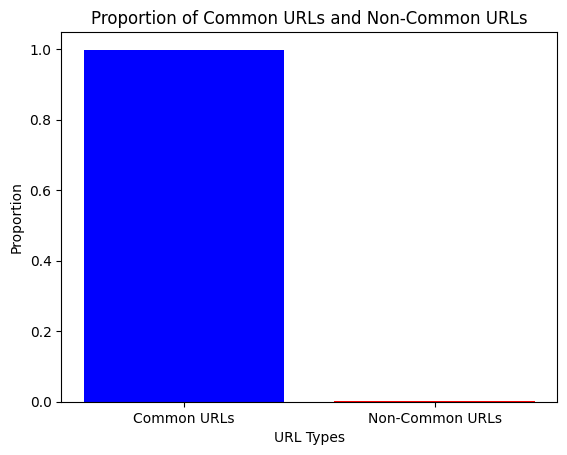

In [22]:
import json
import spacy  # version 3.5
import glob
import matplotlib.pyplot as plt
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
common_urls_per_file = []
common_urls = []
non_common_urls = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        liste_url_entourage = []
        liste_url_entite = []

        i = 1
        dico={}
        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text

            doc = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc2._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)

            common_urls.extend(liste_url_entite)
            common_urls_per_file.append((path, set(liste_url_entite) & set(liste_url_entourage)))

        non_common_urls.extend(liste_url_entite)

# Calculate proportions
total_common_urls = len(common_urls)
total_non_common_urls = len(non_common_urls)
total_urls = total_common_urls + total_non_common_urls
common_urls_proportion = total_common_urls / total_urls
non_common_urls_proportion = total_non_common_urls / total_urls

# Create a bar plot
labels = ['Common URLs', 'Non-Common URLs']
proportions = [common_urls_proportion, non_common_urls_proportion]

plt.bar(labels, proportions, color=['blue', 'red'])
plt.xlabel('URL Types')
plt.ylabel('Proportion')
plt.title('Proportion of Common URLs and Non-Common URLs')
plt.show()


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 11:03:22 2023

@author: antonomaz
"""


import json
import spacy  # version 3.5
import glob
import matplotlib as plt
import matplotlib.pyplot as plt

import pandas as pd


def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte


def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)


modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
common_urls_per_file = []
common_urls = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        
        
        i = 1
        dico={}
        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            
            doc = nlp(entite)
            doc2 = nlp(contexte)
            liste_url_entourage = []
            liste_url_entite = []
            for ent in doc._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc2._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
            common_urls.extend(liste_url_entite)
            common_urls_per_file.append((path, set(liste_url_entite) & set(liste_url_entourage)))

# Summary table of common URLs
common_urls_table = pd.DataFrame(common_urls, columns=["Common URLs"])
print("Summary Table of Common URLs:")
print(common_urls_table)

# Graph of number of common URLs per JSON file
file_names = [file[0] for file in common_urls_per_file]
num_common_urls = [len(file[1]) for file in common_urls_per_file]

plt.figure(figsize=(12, 6))
plt.bar(file_names, num_common_urls)
plt.xlabel("JSON File")
plt.ylabel("Number of Common URLs")
plt.title("Number of Common URLs per JSON File")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

            

## à la façon de CKP

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed May 24 13:58:02 2023

@author: antonomaz
"""

import json
import glob
import matplotlib.pyplot as plt
import spacy
import pandas as pd

def lire_fichier (chemin):
    with open(chemin) as json_data: 
        dist =json.load(json_data)
    return dist


def stocker_graph(nomfich): 
    
    name_fig = "%s.png"
    print(" nom de la figure ", name_fig)
    plt.ylabel("nombre d'entités liées")
    plt.xlabel("OCR Version")
    plt.xticks(fontsize=10,rotation=25)
    # plt.axis([-1,7,0,1])  
    # plt.legend(non="lower left",ncol=2, bbox_to_anchor=(0,0.98))
    # plt.legend 
    plt.gcf().set_size_inches(8, 9)
    plt.savefig(nomfich)
    plt.clf()
    
    return nomfich 

path_corpora = "../DATA/ELTeC-Fra_2023/*"

for subcorpus in glob.glob(path_corpora):
    x=["Réf"]
    # print(subcorpus)
    for path_version in glob.glob("%s/*"%subcorpus): 
        nlp = spacy.load("fr_core_news_sm")
        nlp.add_pipe("entityLinker", last=True)
        version_OCR = path_version.split("/")[-1]
        version_OCR = version_OCR.split("_")[-1]
        x.append(version_OCR)
        liste_non_sm = []
        liste_non_lg = []
        liste_intersect_sm = []
        liste_intersect_lg = []
        liste_non_ref_lg=[]
        liste_intersect_ref_lg=[] 
        liste_non_ref_sm=[]
        liste_intersect_ref_sm=[] 
        output=path_version.split("/")[-1]
        output=output.split("_")[0]        
        #print(x)
        for path in glob.glob("%s/*/*/*.json"%subcorpus):
            # liste_res=[]
            # print(path)
            texte = lire_fichier(path)
            doc = nlp(texte)
            list_resultats = []
            list_entites = []
            common_urls =[]
            common_urls_per_file =[]
            non = 0
            intersect = 0
            cK=0
            
            i = 1
            dico={}
            for ent in doc.ents:
                compteur = 1
                contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
                entite = ent.text
                
                doc = nlp(entite)
                doc2 = nlp(contexte)
                liste_url_entourage = []
                liste_url_entite = []
                intersect = 0
                for ent in doc._.linkedEntities:
                    url_entourage = ent.get_url()
                    liste_url_entourage.append(url_entourage)
                for ent in doc2._.linkedEntities:
                    url_entite = ent.get_url()
                    liste_url_entite.append(url_entite)
                common_urls.extend(liste_url_entite)
                for d in liste_url_entourage :
                    if d in liste_url_entite:
                        intersect = intersect + 1
                compteur =+1
                non=compteur-intersect
                common_urls_per_file.append((path, set(liste_url_entite) & set(liste_url_entourage)))
                nb_commun = len(common_urls_per_file) 
            if "REF" in path:
                if "sm" in path:
                    liste_non_ref_sm.append(non)
                    liste_intersect_ref_sm.append(intersect)
                else:
                    liste_non_ref_lg.append(non)
                    liste_intersect_ref_lg.append(intersect)

            else:
                if "sm" in path:
                    liste_non_sm.append(non)
                    liste_intersect_sm.append(intersect)
                else:
                    liste_non_lg.append(non)
                    liste_intersect_lg.append(intersect)
    print(path)
    print( liste_non_ref_lg,liste_intersect_ref_lg)
   
    liste_non_sm.insert(0,liste_non_ref_sm[0])
    liste_intersect_sm.insert(0,liste_intersect_ref_sm[0])
    liste_non_lg.insert(0,liste_non_ref_lg[0])
    liste_intersect_lg.insert(0,liste_intersect_ref_lg[0])
    dico_mod={}
    dico_mod["sm"]={}
    dico_mod["sm"]["non"]=liste_non_sm
    dico_mod["sm"]["intersect"]=liste_intersect_sm
    dico_mod["sm"]["bottom"]=liste_non_sm
    dico_mod["lg"]={}
    dico_mod["lg"]["non"]=liste_non_lg
    dico_mod["lg"]["intersect"]=liste_intersect_lg
    dico_mod["lg"]["bottom"]=liste_non_lg
       
    for k, va in dico_mod.items():
        print(k,va)
        for kk, vv in va.items():
            largeur_barre = 0.8
            ax=range(len(vv))
            if kk=="non":
                plt.bar(x,vv, width = largeur_barre, color = "red")
                plt.xticks(ax, x, rotation=90)
            if kk=="intersect":
                plt.bar(x, vv, width = largeur_barre, bottom =dico_mod[k]["bottom"] , color = "blue")
            plt.xticks(ax, x, rotation=90)
        stocker_graph("../DATA/%s_spaCy-%s-linking.png"%(output,k))

        # plt.show()
        # print(path)
        # 

ValueError: [E1041] Expected a string, Doc, or bytes as input, but got: <class 'dict'>

In [2]:
import json
import spacy  # version 3.5
import glob
import matplotlib.pyplot as plt
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

def stocker(chemin, contenu):
    with open(chemin, "w") as w:
        json.dump(contenu, w, indent=2)

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
common_urls_per_file = []
common_urls = []
non_common_urls = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        list_resultats = []
        list_entites = []
        compteur = 0
        intersect = 0

        i = 1
        dico={}
        for ent in doc.ents:
            
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            print(entite)
            liste_url_entourage = []
            liste_url_entite = []
            doc2 = nlp(entite)
            doc3 = nlp(contexte)
            for ent in doc2._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc3._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
                print (liste_url_entite)
                for d in liste_url_entourage :
                    if d in liste_url_entite:
                        #print (d)
                        intersect = intersect + 1
            compteur +=1

Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
VEILLÉE
Norine Duclos
['https://www.wikidata.org/wiki/Q3646180']
['https://www.wikidata.org/wiki/Q3646180', 'https://www.wikidata.org/wiki/Q21450529']
['https://www.wikidata.org/wiki/Q3646180', 'https://www.wikidata.org/wiki/Q21450529', 'https://www.wikidata.org/wiki/Q69546']
Norine
['https://www.wikidata.org/wiki/Q870']
Hé
['https://www.wikidata.org/wiki/Q870']
Mandine
['https://www.wikidata.org/wiki/Q870']
Jean-Claude
['https://www.wikidata.org/wiki/Q41207']
['https://www.wikidata.org/wiki/Q41207', 'https://www.wikidata.org/wiki/Q28129894']
['https://www.wikidata.org/wiki/Q41207', 'https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q41207', 'https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q42397176']
['https://www.wikidata.org/wiki/Q41207', 'https://www.

['https://www.wikidata.org/wiki/Q5105328']
['https://www.wikidata.org/wiki/Q5105328', 'https://www.wikidata.org/wiki/Q1068404']
['https://www.wikidata.org/wiki/Q5105328', 'https://www.wikidata.org/wiki/Q1068404', 'https://www.wikidata.org/wiki/Q580750']
Désirée
['https://www.wikidata.org/wiki/Q11574']
['https://www.wikidata.org/wiki/Q11574', 'https://www.wikidata.org/wiki/Q945470']
['https://www.wikidata.org/wiki/Q11574', 'https://www.wikidata.org/wiki/Q945470', 'https://www.wikidata.org/wiki/Q5357120']
['https://www.wikidata.org/wiki/Q11574', 'https://www.wikidata.org/wiki/Q945470', 'https://www.wikidata.org/wiki/Q5357120', 'https://www.wikidata.org/wiki/Q984179']
Roux
['https://www.wikidata.org/wiki/Q580750']
['https://www.wikidata.org/wiki/Q580750', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q580750', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q11573']
Gaspard
['https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.

['https://www.wikidata.org/wiki/Q499594']
['https://www.wikidata.org/wiki/Q499594', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q499594', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q206621']
Pierre
['https://www.wikidata.org/wiki/Q10200']
['https://www.wikidata.org/wiki/Q10200', 'https://www.wikidata.org/wiki/Q678464']
['https://www.wikidata.org/wiki/Q10200', 'https://www.wikidata.org/wiki/Q678464', 'https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q10200', 'https://www.wikidata.org/wiki/Q678464', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q5155503']
Remblay
['https://www.wikidata.org/wiki/Q678464']
['https://www.wikidata.org/wiki/Q678464', 'https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q678464', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q5155503']
Ch' solé
['https://www.wikidata.org/wiki/Q191609']
['https://www.wikidata.org/w

['https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q34442']
Armandine
['https://www.wikidata.org/wiki/Q203005']
Nom-de-Nom
['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q45382']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q45382', 'https://www.wikidata.org/wiki/Q5357120']
Armandine
['https://www.wikidata.org/wiki/Q5357120']
Remblay
['https://www.wikidata.org/wiki/Q17097794']
['https://www.wikidata.org/wiki/Q17097794', 'https://www.wikidata.org/wiki/Q156389']
['https://www.wikidata.org/wiki/Q17097794', 'https://www.wikidata.org/wiki/Q156389', 'https://www.wikidata.org/wiki/Q12608302']
Jean-Claude
['https://www.wikidata.org/wiki/Q156389']
['https://www.wikidata.org/wiki/Q156389', 'https://www.wikidata.org/wiki/Q

['https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q7559']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q7559', 'https://www.wikidata.org/wiki/Q45382']
Expliquez
['https://www.wikidata.org/wiki/Q3303226']
['https://www.wikidata.org/wiki/Q3303226', 'https://www.wikidata.org/wiki/Q273441']
Pierre
['https://www.wikidata.org/wiki/Q273441']
['https://www.wikidata.org/wiki/Q273441', 'https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q273441', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q273441', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q3184003']
['https://www.wikidata.org/wiki/Q273441', 'https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q3184003', 'https://www.wikidata.org/wiki/Q750']


['https://www.wikidata.org/wiki/Q234061']
['https://www.wikidata.org/wiki/Q234061', 'https://www.wikidata.org/wiki/Q6668068']
Pierre
['https://www.wikidata.org/wiki/Q1758354']
['https://www.wikidata.org/wiki/Q1758354', 'https://www.wikidata.org/wiki/Q604532']
['https://www.wikidata.org/wiki/Q1758354', 'https://www.wikidata.org/wiki/Q604532', 'https://www.wikidata.org/wiki/Q40747']
Tope
['https://www.wikidata.org/wiki/Q7559']
['https://www.wikidata.org/wiki/Q7559', 'https://www.wikidata.org/wiki/Q2016301']
Rose, les hommes
['https://www.wikidata.org/wiki/Q7111291']
['https://www.wikidata.org/wiki/Q7111291', 'https://www.wikidata.org/wiki/Q82818']
['https://www.wikidata.org/wiki/Q7111291', 'https://www.wikidata.org/wiki/Q82818', 'https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q7111291', 'https://www.wikidata.org/wiki/Q82818', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q7285188']
['https://www.wikidata.org/wiki/Q7111291', 'https://www.

['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q2893048']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q2893048', 'https://www.wikidata.org/wiki/Q3084981']
Mes petiots
['https://www.wikidata.org/wiki/Q3211581']
['https://www.wikidata.org/wiki/Q3211581', 'https://www.wikidata.org/wiki/Q3231865']
bon Dieu
['https://www.wikidata.org/wiki/Q34327']
['https://www.wikidata.org/wiki/Q34327', 'https://www.wikidata.org/wiki/Q3231865']
['https://www.wikidata.org/wiki/Q34327', 'https://www.wikidata.org/wiki/Q3231865', 'https://www.wikidata.org/wiki/Q3027560']
M. Céran
['https://www.wikidata.org/wiki/Q8441']
['https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610']
['https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610', 'https://www.wikidat

['https://www.wikidata.org/wiki/Q8441']
['https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610']
['https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610', 'https://www.wikidata.org/wiki/Q3164791']
Norine
['https://www.wikidata.org/wiki/Q519034']
La Rose
['https://www.wikidata.org/wiki/Q519034']
M. Céran
['https://www.wikidata.org/wiki/Q47538051']
['https://www.wikidata.org/wiki/Q47538051', 'https://www.wikidata.org/wiki/Q8441']
['https://www.wikidata.org/wiki/Q47538051', 'https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610']
['https://www.wikidata.org/wiki/Q47538051', 'https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610', 'https://www.wikidata.org/wiki/Q791134']
['https://www.wikidata.org/wiki/Q47538051', 'https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610', 'https://www.wikidata.org/wiki/Q791134', 'https://www.wikidata.org/wiki/Q6750275']
Allez, allez !
['https://

['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q41782']
Mlle Dorothée
['https://www.wikidata.org/wiki/Q22906900']
['https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q448910']
['https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q448910', 'https://www.wikidata.org/wiki/Q27031051']
Jean-Claude
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q9765']
Jean-Claude
Bah !
['https://www.wikidata.org/wiki/Q633132']
Saint-Brunelle
Jean-Claude
['https://www.wikidata.org/wiki/Q1139213']
['https://www.wikidata.org/wiki/Q1139213', 'https://www.wikidata.org/wiki/Q288']
['https://www.wikidata.org/wiki/Q1139213', 'https://www.wikidata.org/wiki/Q288', 'https://www.wikidata.org/wiki/Q3164791']
Adonc
['https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q131183']
[

['https://www.wikidata.org/wiki/Q1442533']
['https://www.wikidata.org/wiki/Q1442533', 'https://www.wikidata.org/wiki/Q3303226']
['https://www.wikidata.org/wiki/Q1442533', 'https://www.wikidata.org/wiki/Q3303226', 'https://www.wikidata.org/wiki/Q751876']
État
['https://www.wikidata.org/wiki/Q3303226']
['https://www.wikidata.org/wiki/Q3303226', 'https://www.wikidata.org/wiki/Q751876']
['https://www.wikidata.org/wiki/Q3303226', 'https://www.wikidata.org/wiki/Q751876', 'https://www.wikidata.org/wiki/Q1069376']
Charité
['https://www.wikidata.org/wiki/Q43115']
['https://www.wikidata.org/wiki/Q43115', 'https://www.wikidata.org/wiki/Q23815652']
['https://www.wikidata.org/wiki/Q43115', 'https://www.wikidata.org/wiki/Q23815652', 'https://www.wikidata.org/wiki/Q1382472']
['https://www.wikidata.org/wiki/Q43115', 'https://www.wikidata.org/wiki/Q23815652', 'https://www.wikidata.org/wiki/Q1382472', 'https://www.wikidata.org/wiki/Q623']
Clarisse
['https://www.wikidata.org/wiki/Q1382472']
['https://www

['https://www.wikidata.org/wiki/Q38']
['https://www.wikidata.org/wiki/Q38', 'https://www.wikidata.org/wiki/Q532']
Désirée
['https://www.wikidata.org/wiki/Q945470']
Armandine
['https://www.wikidata.org/wiki/Q1655788']
['https://www.wikidata.org/wiki/Q1655788', 'https://www.wikidata.org/wiki/Q945470']
Rose
['https://www.wikidata.org/wiki/Q7862242']
['https://www.wikidata.org/wiki/Q7862242', 'https://www.wikidata.org/wiki/Q519034']
Un beau matin
Jean-Claude
madame la mairesse
['https://www.wikidata.org/wiki/Q1799831']
['https://www.wikidata.org/wiki/Q1799831', 'https://www.wikidata.org/wiki/Q17146837']
['https://www.wikidata.org/wiki/Q1799831', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q1799831', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q40747']
Pierre
['https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q56539707', 

['https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q18205925']
['https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q18205925', 'https://www.wikidata.org/wiki/Q945470']
Désirée
['https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q18205925']
['https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q18205925', 'https://www.wikidata.org/wiki/Q945470']
['https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q18205925', 'https://www.wikidata.org/wiki/Q945470', 'https://www.wikidata.org/wiki/Q17146837']
Saint-Brunelle
['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q1053']
Morlincourt
['https://www.wikidata.org/wiki/Q1336814']
['https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q519034']
Rose
['https://www.wikidata.org/wiki/Q1336

['https://www.wikidata.org/wiki/Q244380']
['https://www.wikidata.org/wiki/Q244380', 'https://www.wikidata.org/wiki/Q3084981']
fieu de Toinon
['https://www.wikidata.org/wiki/Q244380']
['https://www.wikidata.org/wiki/Q244380', 'https://www.wikidata.org/wiki/Q3084981']
Saint-Brunelle
['https://www.wikidata.org/wiki/Q2088357']
['https://www.wikidata.org/wiki/Q2088357', 'https://www.wikidata.org/wiki/Q27477490']
['https://www.wikidata.org/wiki/Q2088357', 'https://www.wikidata.org/wiki/Q27477490', 'https://www.wikidata.org/wiki/Q869406']
['https://www.wikidata.org/wiki/Q2088357', 'https://www.wikidata.org/wiki/Q27477490', 'https://www.wikidata.org/wiki/Q869406', 'https://www.wikidata.org/wiki/Q580750']
pré Brugnon
['https://www.wikidata.org/wiki/Q7838854']
['https://www.wikidata.org/wiki/Q7838854', 'https://www.wikidata.org/wiki/Q18035109']
pré Brugnon
Saint-Brunelle
['https://www.wikidata.org/wiki/Q532']
['https://www.wikidata.org/wiki/Q532', 'https://www.wikidata.org/wiki/Q2671395']
['http

['https://www.wikidata.org/wiki/Q201157']
Jean-Claude
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755', 'https://www.wikidata.org/wiki/Q741536']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755', 'https://www.wikidata.org/wiki/Q741536', 'https://www.wikidata.org/wiki/Q12608302']
Dizy l'avare
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755', 'https://www.wikidata.org/wiki/Q741536']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755', 'https://www.wikidata.org/wiki/Q741536', 'https://www.wikidata.org/wiki/Q12608302']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q170497

['https://www.wikidata.org/wiki/Q2096893']
['https://www.wikidata.org/wiki/Q2096893', 'https://www.wikidata.org/wiki/Q2994261']
['https://www.wikidata.org/wiki/Q2096893', 'https://www.wikidata.org/wiki/Q2994261', 'https://www.wikidata.org/wiki/Q741536']
['https://www.wikidata.org/wiki/Q2096893', 'https://www.wikidata.org/wiki/Q2994261', 'https://www.wikidata.org/wiki/Q741536', 'https://www.wikidata.org/wiki/Q3055244']
Et Dizy
['https://www.wikidata.org/wiki/Q22993132']
['https://www.wikidata.org/wiki/Q22993132', 'https://www.wikidata.org/wiki/Q3055244']
Jean-Claude
['https://www.wikidata.org/wiki/Q3164791']
Dizy
['https://www.wikidata.org/wiki/Q1047476']
['https://www.wikidata.org/wiki/Q1047476', 'https://www.wikidata.org/wiki/Q3164791']
Jean-Claude
['https://www.wikidata.org/wiki/Q8146']
['https://www.wikidata.org/wiki/Q8146', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q8146', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q5588

['https://www.wikidata.org/wiki/Q17146837']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q10464']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q10464', 'https://www.wikidata.org/wiki/Q1130409']
Jean-Claude
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1768889']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1768889', 'https://www.wikidata.org/wiki/Q1059190']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1768889', 'https://www.

['https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q2102344']
Morlincourt
['https://www.wikidata.org/wiki/Q1336814']
['https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q6750275']
Paris
['https://www.wikidata.org/wiki/Q90']
['https://www.wikidata.org/wiki/Q90', 'https://www.wikidata.org/wiki/Q1068824']
Quoi !
['https://www.wikidata.org/wiki/Q1825744']
['https://www.wikidata.org/wiki/Q1825744', 'https://www.wikidata.org/wiki/Q3164791']
Jean-Claude
['https://www.wikidata.org/wiki/Q1825744']
['https://www.wikidata.org/wiki/Q1825744', 'https://www.wikidata.org/wiki/Q3164791']
Saint-Brunelle
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q11703']
Excusez
['https://www.wikidata.org/wiki/Q203005']
['https://www.wikidata.org/wiki/Q203005', 'https://www.wikidata.org/wiki/Q10200']
['https://www.wikidata.org/wiki/Q203005', 'https://www.wikidat

['https://www.wikidata.org/wiki/Q3577064']
['https://www.wikidata.org/wiki/Q3577064', 'https://www.wikidata.org/wiki/Q21501975']
['https://www.wikidata.org/wiki/Q3577064', 'https://www.wikidata.org/wiki/Q21501975', 'https://www.wikidata.org/wiki/Q3164791']
Morlincourt
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1336814']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q10200']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q10200', 'https://www.wikidata.org/wiki/Q8441']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q10200', 'https://www.wikidata.org/wiki/Q8441', 'https://www.wikidata.org/wiki/Q859610']
M. Céran
['https://www.wikidata.org/wiki/Q34943']
['https://www.wikidata.org/wiki/Q34943', 'https://www.wikid

['https://www.wikidata.org/wiki/Q8765']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943', 'https://www.wikidata.org/wiki/Q3527366']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943', 'https://www.wikidata.org/wiki/Q3527366', 'https://www.wikidata.org/wiki/Q17146837']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943', 'https://www.wikidata.org/wiki/Q3527366', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943', 'https://www.wikida

['https://www.wikidata.org/wiki/Q1931128']
['https://www.wikidata.org/wiki/Q1931128', 'https://www.wikidata.org/wiki/Q453819']
['https://www.wikidata.org/wiki/Q1931128', 'https://www.wikidata.org/wiki/Q453819', 'https://www.wikidata.org/wiki/Q7835862']
['https://www.wikidata.org/wiki/Q1931128', 'https://www.wikidata.org/wiki/Q453819', 'https://www.wikidata.org/wiki/Q7835862', 'https://www.wikidata.org/wiki/Q1308274']
Jean-Claude
['https://www.wikidata.org/wiki/Q1308274']
['https://www.wikidata.org/wiki/Q1308274', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q1308274', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1595911']
['https://www.wikidata.org/wiki/Q1308274', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1595911', 'https://www.wikidata.org/wiki/Q5155503']
Hein
['https://www.wikidata.org/wiki/Q1308274']
['https://www.wikidata.org/wiki/Q1308274', 'https://www.wikidata.org/wiki/Q3164791']
['https://

YEILLEE
Norine Duclos
['https://www.wikidata.org/wiki/Q3646180']
['https://www.wikidata.org/wiki/Q3646180', 'https://www.wikidata.org/wiki/Q3711325']
Norine
['https://www.wikidata.org/wiki/Q870']
precher
['https://www.wikidata.org/wiki/Q870']
['https://www.wikidata.org/wiki/Q870', 'https://www.wikidata.org/wiki/Q560']
petiotes
['https://www.wikidata.org/wiki/Q870']
['https://www.wikidata.org/wiki/Q870', 'https://www.wikidata.org/wiki/Q560']
['https://www.wikidata.org/wiki/Q870', 'https://www.wikidata.org/wiki/Q560', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q870', 'https://www.wikidata.org/wiki/Q560', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319']
dpeche-toi
['https://www.wikidata.org/wiki/Q560']
['https://www.wikidata.org/wiki/Q560', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q560', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319']
['https://www.wikidata.or

['https://www.wikidata.org/wiki/Q15444128']
['https://www.wikidata.org/wiki/Q15444128', 'https://www.wikidata.org/wiki/Q1108141']
['https://www.wikidata.org/wiki/Q15444128', 'https://www.wikidata.org/wiki/Q1108141', 'https://www.wikidata.org/wiki/Q7136507']
Jacqueline
['https://www.wikidata.org/wiki/Q6898686']
['https://www.wikidata.org/wiki/Q6898686', 'https://www.wikidata.org/wiki/Q1799831']
['https://www.wikidata.org/wiki/Q6898686', 'https://www.wikidata.org/wiki/Q1799831', 'https://www.wikidata.org/wiki/Q3226476']
['https://www.wikidata.org/wiki/Q6898686', 'https://www.wikidata.org/wiki/Q1799831', 'https://www.wikidata.org/wiki/Q3226476', 'https://www.wikidata.org/wiki/Q391321']
Gaspard
['https://www.wikidata.org/wiki/Q1581']
Desiree
['https://www.wikidata.org/wiki/Q1757650']
['https://www.wikidata.org/wiki/Q1757650', 'https://www.wikidata.org/wiki/Q467925']
['https://www.wikidata.org/wiki/Q1757650', 'https://www.wikidata.org/wiki/Q467925', 'https://www.wikidata.org/wiki/Q1426138']

['https://www.wikidata.org/wiki/Q16043593']
['https://www.wikidata.org/wiki/Q16043593', 'https://www.wikidata.org/wiki/Q11582']
['https://www.wikidata.org/wiki/Q16043593', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q16043593', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
pre Roux
['https://www.wikidata.org/wiki/Q11582']
['https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
Mlarie
['https://www.wikidata.org/wiki/Q191118']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wi

['https://www.wikidata.org/wiki/Q403']
['https://www.wikidata.org/wiki/Q403', 'https://www.wikidata.org/wiki/Q156389']
['https://www.wikidata.org/wiki/Q403', 'https://www.wikidata.org/wiki/Q156389', 'https://www.wikidata.org/wiki/Q7559']
dragon
['https://www.wikidata.org/wiki/Q7559']
['https://www.wikidata.org/wiki/Q7559', 'https://www.wikidata.org/wiki/Q506144']
Tous-
saint
['https://www.wikidata.org/wiki/Q4691192']
['https://www.wikidata.org/wiki/Q4691192', 'https://www.wikidata.org/wiki/Q956243']
['https://www.wikidata.org/wiki/Q4691192', 'https://www.wikidata.org/wiki/Q956243', 'https://www.wikidata.org/wiki/Q6689698']
dc loup
['https://www.wikidata.org/wiki/Q956243']
['https://www.wikidata.org/wiki/Q956243', 'https://www.wikidata.org/wiki/Q6689698']
['https://www.wikidata.org/wiki/Q956243', 'https://www.wikidata.org/wiki/Q6689698', 'https://www.wikidata.org/wiki/Q6974681']
Fut-cel
['https://www.wikidata.org/wiki/Q956243']
['https://www.wikidata.org/wiki/Q956243', 'https://www.wiki

['https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q4733092']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q4733092', 'https://www.wikidata.org/wiki/Q40747']
routel

['https://www.wikidata.org/wiki/Q1655788']
['https://www.wikidata.org/wiki/Q1655788', 'https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q1655788', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q1655788', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q4733092']
['https://www.wikidata.org/wiki/Q1655788', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org

['https://www.wikidata.org/wiki/Q203005']
['https://www.wikidata.org/wiki/Q203005', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q203005', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q68136']
VIILLAGE
['https://www.wikidata.org/wiki/Q6529813']
['https://www.wikidata.org/wiki/Q6529813', 'https://www.wikidata.org/wiki/Q7158657']
Norine
Defunt
Jean-Claude
Mlor-
lincourt;
['https://www.wikidata.org/wiki/Q1595418']
prechant
['https://www.wikidata.org/wiki/Q548924']
Le bon Dieu
['https://www.wikidata.org/wiki/Q3027560']
['https://www.wikidata.org/wiki/Q3027560', 'https://www.wikidata.org/wiki/Q3103189']
['https://www.wikidata.org/wiki/Q3027560', 'https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q21199']
['https://www.wikidata.org/wiki/Q3027560', 'https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q21199', 'https://www.wikidata.org/wiki/Q3711325']
Morlincourt
['https://www.wikidata.org/wiki/Q

['https://www.wikidata.org/wiki/Q191118']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q6666169']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q6666169', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q6666169', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q405']
['https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q6666169', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q405', 'https://www.wikidata.org/wiki/Q532']
Norine
ma-
niere
['https://www.wikidata.org/wiki/Q519034']
pres
['https://www.wikidata.org/wiki/Q7234232']
['https://www.wikidata.org/wiki/Q7234232', 'https://www.wikidata.org/wiki/Q1092777']
['https://www.wikidata.org/wiki/Q7234232', 'https://www.wikidata.org/wiki/Q1092777', 'https://www.wikidata.org/wiki/Q9325']
Plaisant lh
['https://www.wikidata.org/wiki/Q499594']
['https://www.w

['https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319']
Pierre
['https://www.wikidata.org/wiki/Q40747']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q40747', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319']
i Norine
I-
MON VILLAGE
['https://www.wikidata.org/wiki/Q176440']
Rose
['https://www.wikidata.org/wiki/Q2724303']
['https://www.wikidata.org/wiki/Q2724303', 'https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q2724303', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q156389']
['https://www.wikidata.org/wiki/Q2724303', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q156389', 'https://www.wikidata.org/wiki/Q40747']
ca
Iais
Pie

Toinon
['https://www.wikidata.org/wiki/Q9884']
Morlincourt Vous
['https://www.wikidata.org/wiki/Q1336814']
['https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q90']
Paris
['https://www.wikidata.org/wiki/Q90']
Morlincourt
['https://www.wikidata.org/wiki/Q92764']
['https://www.wikidata.org/wiki/Q92764', 'https://www.wikidata.org/wiki/Q35132']
['https://www.wikidata.org/wiki/Q92764', 'https://www.wikidata.org/wiki/Q35132', 'https://www.wikidata.org/wiki/Q1336814']
['https://www.wikidata.org/wiki/Q92764', 'https://www.wikidata.org/wiki/Q35132', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q92764', 'https://www.wikidata.org/wiki/Q35132', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q8441']
['https://www.wikidata.org/wiki/Q92764', 'https://www.wikidata.org/wiki/Q35132', 'https://www.wikidata.org/wiki/Q1336814', 'https://www.wikidat

['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q11573']
mi-
sres
['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q779475']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q779475', 'https://www.wikidata.org/wiki/Q122894']
Jeacquet
['https://www.wikidata.org/wiki/Q28129894']
Jeacquet
['https://www.wikidata.org/wiki/Q17148194']
['https://www.wikidata.org/wiki/Q17148194', 'https://www.wikidata.org/wiki/Q465227']
['https://www.wikidata.org/wiki/Q17148194', 'https://www.wikidata.org/wiki/Q465227', 'https://www.wikidata.org/wiki/Q14913226']
[

['https://www.wikidata.org/wiki/Q31482']
['https://www.wikidata.org/wiki/Q31482', 'https://www.wikidata.org/wiki/Q382617']
Mor-
linval
ous observez

['https://www.wikidata.org/wiki/Q621691']
['https://www.wikidata.org/wiki/Q621691', 'https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q621691', 'https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q5331423']
Saint-Brunelle
['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q5331423']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q5331423', 'https://www.wikidata.org/wiki/Q48700367']
vicux hu-
guenot
['https://www.wikidata.org/wiki/Q9747']
['https://www.wikidata.org/wiki/Q9747', 'https://www.wikidata.org/wiki/Q128751']
['https://www.wikidata.org/wiki/Q9747', 'https://www.wikidata.org/wiki/Q128751', 'https://www.wikidata.org/wiki/Q5090537']
['https://www.wikidata.org/wiki/Q9747', 'https://www.wikidata.org/wiki/Q

['https://www.wikidata.org/wiki/Q1213581']
['https://www.wikidata.org/wiki/Q1213581', 'https://www.wikidata.org/wiki/Q5280186']
['https://www.wikidata.org/wiki/Q1213581', 'https://www.wikidata.org/wiki/Q5280186', 'https://www.wikidata.org/wiki/Q5446007']
['https://www.wikidata.org/wiki/Q1213581', 'https://www.wikidata.org/wiki/Q5280186', 'https://www.wikidata.org/wiki/Q5446007', 'https://www.wikidata.org/wiki/Q5446007']
pCechd
['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q83267']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q83267', 'https://www.wikidata.org/wiki/Q3027560']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q83267', 'https://www.wikidata.org/wiki/Q3027560', 'https://www.wikidata.org/wiki/Q9186']
Dieu
['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q191118']
['https://www.wikidata.org/w

['https://www.wikidata.org/wiki/Q82435']
A2
['https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204']
eeeese
1-4
ee ier¬
z
['https://www.wikidata.org/wiki/Q938047']
['https://www.wikidata.org/wiki/Q938047', 'https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q938047', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204']
['https://www.wikidata.org/wiki/Q938047', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q938047', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q180309']
S-
['https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204']
['https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q204', 'https://www.wi

['https://www.wikidata.org/wiki/Q11621076']
['https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q12985221']
['https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q12985221', 'https://www.wikidata.org/wiki/Q2091584']
nee ieeſ
E
['https://www.wikidata.org/wiki/Q682']
['https://www.wikidata.org/wiki/Q682', 'https://www.wikidata.org/wiki/Q192621']
['https://www.wikidata.org/wiki/Q682', 'https://www.wikidata.org/wiki/Q192621', 'https://www.wikidata.org/wiki/Q11621076']
['https://www.wikidata.org/wiki/Q682', 'https://www.wikidata.org/wiki/Q192621', 'https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q12985221']
['https://www.wikidata.org/wiki/Q682', 'https://www.wikidata.org/wiki/Q192621', 'https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q12985221', 'https://www.wikidata.org/wiki/Q2091584']
['https://www.wikidata.org/wiki/Q682', 'https://www.wikidata.org/wiki/Q192621', 'https://www.wikidata.org/wiki/Q1

['https://www.wikidata.org/wiki/Q11621076']
['https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q7294741']
['https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q7294741', 'https://www.wikidata.org/wiki/Q191118']
['https://www.wikidata.org/wiki/Q11621076', 'https://www.wikidata.org/wiki/Q7294741', 'https://www.wikidata.org/wiki/Q191118', 'https://www.wikidata.org/wiki/Q844976']
pl e’iei
['https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q18036987']
teee
Ae
['https://www.wikidata.org/wiki/Q18036987']
eE
er ei dsl4
2E
-E 2:
Ai e eeeiepte
S V
r¬
e ’j¬
3 u.
['https://www.wikidata.org/wiki/Q2091584']
['https://www.wikidata.org/wiki/Q2091584', 'https://www.wikidata.org/wiki/Q11582']
['https://www.wikidata.org/wiki/Q2091584', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q2091584']
['https://www.wikidata.org/wiki/Q2091584', 'https://www.wikidata.org/wiki/Q11582', 'h

['https://www.wikidata.org/wiki/Q180687']
['https://www.wikidata.org/wiki/Q180687', 'https://www.wikidata.org/wiki/Q3056045']
['https://www.wikidata.org/wiki/Q180687', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q454945']
eee lereisqſſee
- ¬
e  ſee ee
e
e-
['https://www.wikidata.org/wiki/Q3056045']
['https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q454945']
['https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q454945', 'https://www.wikidata.org/wiki/Q704740']
['https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q454945', 'https://www.wikidata.org/wiki/Q704740', 'https://www.wikidata.org/wiki/Q704740']
eeeet&
A
a-¬
['https://www.wikidata.org/wiki/Q9852']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q2091584']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q2091584', 'https://www.wikidata.org/wiki/Q8043']
-i

ap
['https://www.wikidata.org/wiki/Q

['https://www.wikidata.org/wiki/Q1595418']
['https://www.wikidata.org/wiki/Q1595418', 'https://www.wikidata.org/wiki/Q3688833']
['https://www.wikidata.org/wiki/Q1595418', 'https://www.wikidata.org/wiki/Q3688833', 'https://www.wikidata.org/wiki/Q1092777']
['https://www.wikidata.org/wiki/Q1595418', 'https://www.wikidata.org/wiki/Q3688833', 'https://www.wikidata.org/wiki/Q1092777', 'https://www.wikidata.org/wiki/Q1595418']
Dieu
['https://www.wikidata.org/wiki/Q9852']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q637820']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q637820', 'https://www.wikidata.org/wiki/Q3027560']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q637820', 'https://www.wikidata.org/wiki/Q3027560', 'https://www.wikidata.org/wiki/Q40393']
J'ajou-
terai meme
['https://www.wikidata.org/wiki/Q131183']
['https://www.wikidata.org/wiki/Q131183', 'https://www.wikidata.org/wiki/Q832002']
VILLAGE
['https://ww

['https://www.wikidata.org/wiki/Q1799831']
MIoN
['https://www.wikidata.org/wiki/Q1825744']
['https://www.wikidata.org/wiki/Q1825744', 'https://www.wikidata.org/wiki/Q61037170']
['https://www.wikidata.org/wiki/Q1825744', 'https://www.wikidata.org/wiki/Q61037170', 'https://www.wikidata.org/wiki/Q16043593']
['https://www.wikidata.org/wiki/Q1825744', 'https://www.wikidata.org/wiki/Q61037170', 'https://www.wikidata.org/wiki/Q16043593', 'https://www.wikidata.org/wiki/Q465227']
Jean-Claude
['https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q1368412']
meme
['https://www.wikidata.org/wiki/Q12608302']
Mla-
not
['https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q7813319', 'https://www.wikidata.org/wiki/Q18035109']
Clarisse
['https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata

['https://www.wikidata.org/wiki/Q499594']
['https://www.wikidata.org/wiki/Q499594', 'https://www.wikidata.org/wiki/Q1442533']
['https://www.wikidata.org/wiki/Q499594', 'https://www.wikidata.org/wiki/Q1442533', 'https://www.wikidata.org/wiki/Q16859830']
['https://www.wikidata.org/wiki/Q499594', 'https://www.wikidata.org/wiki/Q1442533', 'https://www.wikidata.org/wiki/Q16859830', 'https://www.wikidata.org/wiki/Q751876']
lEtat
['https://www.wikidata.org/wiki/Q16859830']
['https://www.wikidata.org/wiki/Q16859830', 'https://www.wikidata.org/wiki/Q751876']
ca
['https://www.wikidata.org/wiki/Q3981457']
soi-meme
['https://www.wikidata.org/wiki/Q1382472']
['https://www.wikidata.org/wiki/Q1382472', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q1382472', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q978']
['https://www.wikidata.org/wiki/Q1382472', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q978', 'https://www.wikid

['https://www.wikidata.org/wiki/Q82435']
Seri
['https://www.wikidata.org/wiki/Q1318054']
['https://www.wikidata.org/wiki/Q1318054', 'https://www.wikidata.org/wiki/Q704740']
['https://www.wikidata.org/wiki/Q1318054', 'https://www.wikidata.org/wiki/Q704740', 'https://www.wikidata.org/wiki/Q191']
['https://www.wikidata.org/wiki/Q1318054', 'https://www.wikidata.org/wiki/Q704740', 'https://www.wikidata.org/wiki/Q191', 'https://www.wikidata.org/wiki/Q41926']
['https://www.wikidata.org/wiki/Q1318054', 'https://www.wikidata.org/wiki/Q704740', 'https://www.wikidata.org/wiki/Q191', 'https://www.wikidata.org/wiki/Q41926', 'https://www.wikidata.org/wiki/Q36583']
['https://www.wikidata.org/wiki/Q1318054', 'https://www.wikidata.org/wiki/Q704740', 'https://www.wikidata.org/wiki/Q191', 'https://www.wikidata.org/wiki/Q41926', 'https://www.wikidata.org/wiki/Q36583', 'https://www.wikidata.org/wiki/Q18031327']
¬

Ler¬
r
3
['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'h

['https://www.wikidata.org/wiki/Q3711325']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q11582']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q1295694']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q11582', 'https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q1295694', 'https://www.wikidata.org/wiki/Q9884']
['https://www.wikidata.org/wiki/Q3711325', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q11582', 'htt

['https://www.wikidata.org/wiki/Q6192180']
['https://www.wikidata.org/wiki/Q6192180', 'https://www.wikidata.org/wiki/Q82435']
el oe e eie eie er
['https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q3516835']
['https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q3516835', 'https://www.wikidata.org/wiki/Q191118']
eer
¬¬!
!
eE
['https://www.wikidata.org/wiki/Q9927']
['https://www.wikidata.org/wiki/Q9927', 'https://www.wikidata.org/wiki/Q3056045']
['https://www.wikidata.org/wiki/Q9927', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q191']
['https://www.wikidata.org/wiki/Q9927', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q191', 'https://www.wikidata.org/wiki/Q9739']
['https://www.wikidata.org/wiki/Q9927', 'https://www.wikidata.org/wiki/Q3056045', 'https://www.wikidata.org/wiki/Q191', 'https://www.wikidata.org/wiki/Q9739', 'https://www.wikidata.org/wiki/Q37

['https://www.wikidata.org/wiki/Q105584']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q21199']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q21199', 'https://www.wikidata.org/wiki/Q9852']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q21199', 'https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q105584', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q21199', 

['https://www.wikidata.org/wiki/Q9946']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q82435']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q82435', 'https://www.wikidata.org/wiki/Q6528787']
['https://www.wikidata.org/wiki/Q9946', 'https://www.wikidata.org/wiki/Q8043', 'https://www.wikidata.org/wiki/Q2294', 'https://www.wikidata.org/wiki/Q82435', 'https://

['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q1426138']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q1426138', 'https://www.wikidata.org/wiki/Q465227']
Devise
['https://www.wikidata.org/wiki/Q53815']
h
Norinel
Pauvre jeunessel
['https://www.wikidata.org/wiki/Q36919']
['https://www.wikidata.org/wiki/Q36919', 'https://www.wikidata.org/wiki/Q41782']
Cachez
['https://www.wikidata.org/wiki/Q532']
['https://www.wikidata.org/wiki/Q532', 'https://www.wikidata.org/wiki/Q5357120']
['https://www.wikidata.org/wiki/Q532', 'https://www.wikidata.org/wiki/Q5357120', 'https://www.wikidata.org/wiki/Q6203']
Saint-
L]
)-
MON VILLAGE
['https://www.wikidata.org/wiki/Q6203']
['https://www.wikidata.org/wiki/Q6203', 'https://www.wikidata.org/wiki/Q465227']
['https://www.wikidata.org/wiki/Q6203', 'https://www.wikidata.org/wiki/Q465227', 'https://www.wikidata.org/wiki/Q4978987']
plaft
['https://www.wikidata.org/wik

['https://www.wikidata.org/wiki/Q31482']
['https://www.wikidata.org/wiki/Q31482', 'https://www.wikidata.org/wiki/Q5522596']
Norine
['https://www.wikidata.org/wiki/Q22906900']
['https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q203005']
['https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q203005', 'https://www.wikidata.org/wiki/Q215408']
['https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q203005', 'https://www.wikidata.org/wiki/Q215408', 'https://www.wikidata.org/wiki/Q467925']
Desiree
et d'
['https://www.wikidata.org/wiki/Q3823978']
['https://www.wikidata.org/wiki/Q3823978', 'https://www.wikidata.org/wiki/Q22906900']
['https://www.wikidata.org/wiki/Q3823978', 'https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q28129894']
['https://www.wikidata.org/wiki/Q3823978', 'https://www.wikidata.org/wiki/Q22906900', 'https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q215408']
['htt

['https://www.wikidata.org/wiki/Q3667197']
['https://www.wikidata.org/wiki/Q3667197', 'https://www.wikidata.org/wiki/Q3423685']
Ml
['https://www.wikidata.org/wiki/Q6858689']
['https://www.wikidata.org/wiki/Q6858689', 'https://www.wikidata.org/wiki/Q6555108']
Ceran
['https://www.wikidata.org/wiki/Q9852']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q6858689']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q6858689', 'https://www.wikidata.org/wiki/Q2539']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q6858689', 'https://www.wikidata.org/wiki/Q2539', 'https://www.wikidata.org/wiki/Q8765']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q6858689', 'https://www.wikidata.org/wiki/Q2539', 'https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q6555108']
['https://www.wikidata.org/wiki/Q9852', 'https://www.wikidata.org/wiki/Q6858689', 'https://www.wikidata.org/wiki/Q2539', 'https://

['https://www.wikidata.org/wiki/Q132781']
['https://www.wikidata.org/wiki/Q132781', 'https://www.wikidata.org/wiki/Q320980']
VILLAGE
['https://www.wikidata.org/wiki/Q9415']
['https://www.wikidata.org/wiki/Q9415', 'https://www.wikidata.org/wiki/Q465227']
voila
['https://www.wikidata.org/wiki/Q465227']
Gaspard
['https://www.wikidata.org/wiki/Q465227']
['https://www.wikidata.org/wiki/Q465227', 'https://www.wikidata.org/wiki/Q244380']
fieu de Toinon
['https://www.wikidata.org/wiki/Q244380']
['https://www.wikidata.org/wiki/Q244380', 'https://www.wikidata.org/wiki/Q3084981']
['https://www.wikidata.org/wiki/Q244380', 'https://www.wikidata.org/wiki/Q3084981', 'https://www.wikidata.org/wiki/Q3084981']
Allons
['https://www.wikidata.org/wiki/Q8765']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q4733092']
['https://www.wikidata.org/wiki/Q8765', 'https://www.wikidata.org/wiki/Q4733092', 'https://www.wikidata.org/wiki/Q1063745']
C'est vrai, trois noces l Tout
Saint-Brunelle

['https://www.wikidata.org/wiki/Q1355445']
['https://www.wikidata.org/wiki/Q1355445', 'https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q1355445', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q1355445', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
Jcan-Claude cn empoi-
gnant
['https://www.wikidata.org/wiki/Q1368412']
['https://www.wikidata.org/wiki/Q1368412', 'https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q1368412', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q1368412', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q1368412', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'htt

['https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q122894']
h Jean-Claude
['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755', 'https://www.wikidata.org/wiki/Q12608302']
bDizy l'avare
['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q3164791']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q3164791', 'https://www.wikidata.org/wiki/Q17049755']
['https://www.wikidata.org/wiki/Q122894', 'h

['https://www.wikidata.org/wiki/Q28129894']
['https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q18034086']
Cel-
lier
['https://www.wikidata.org/wiki/Q991961']
['https://www.wikidata.org/wiki/Q991961', 'https://www.wikidata.org/wiki/Q28129894']
Jcan-Claude
['https://www.wikidata.org/wiki/Q28129894']
['https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q34943']
ba-
biller
['https://www.wikidata.org/wiki/Q47458707']
['https://www.wikidata.org/wiki/Q47458707', 'https://www.wikidata.org/wiki/Q388242']
['https://www.wikidata.org/wiki/Q47458707', 'https://www.wikidata.org/wiki/Q388242', 'https://www.wikidata.org/wiki/Q7401']
vis pa-
raitre
['https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q203767']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.w

['https://www.wikidata.org/wiki/Q7238710']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186', 'https://www.wikidata.org/wiki/Q619989']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186', 'https://www.wikidata.org/wiki/Q619989', 'https://www.wikidata.org/wiki/Q3405693']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186', 'https://www.wikidata.org/wiki/Q619989', 'https://www.wikidata.org/wiki/Q3405693', 'https://www.wikidata.org/wiki/Q357404']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186', 'https://www.wikidata.org/wiki/Q619989', 'https://www.wikidata.org/wiki/Q3405693', 'https://www.wikidata.org/wiki/Q357404', 'https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q7238710', 'https://www.wikidata.org/wiki/Q819186', 'https://www.wikidata.org/wiki/Q619989',

['https://www.wikidata.org/wiki/Q13586859']
Pardonnez-lui
Vive
['https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034']
Rose, le gars
Decnis
['https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q531813']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q531813', 'https://www.wikidata.org/wiki/Q28129894']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q531813', 'https://www.wikidata.org/wiki/Q28129894', 'https://www.wikidata.org/wiki/Q586615']
['https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q519034', 'https://www.wikidata.org/wiki/Q531813', 'https://www.wikidata.org/w

['https://www.wikidata.org/wiki/Q17146837']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q9884']
Madame
['https://www.wikidata.org/wiki/Q3103189']
['https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q17146837']
['https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707']
['https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q45382']
['https://www.wikidata.org/wiki/Q3103189', 'https://www.wikidata.org/wiki/Q17146837', 'https://www.wikidata.org/wiki/Q56539707', 'https://www.wikidata.org/wiki/Q45382', 'https://www.wikidata.org/wiki/Q382617']
Ceran
['https://www.wikidata.org/wiki/Q8441']
Roux
['https://www.wikidata.org/wiki/Q92764']
['https

['https://www.wikidata.org/wiki/Q181593']
['https://www.wikidata.org/wiki/Q181593', 'https://www.wikidata.org/wiki/Q899409']
['https://www.wikidata.org/wiki/Q181593', 'https://www.wikidata.org/wiki/Q899409', 'https://www.wikidata.org/wiki/Q2637489']
beeusee de butiues
['https://www.wikidata.org/wiki/Q180309']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q2102344']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q2102344', 'https://www.wikidata.org/wiki/Q45382']
['https://www.wikidata.org/wiki/Q180309', 'https://www.wikidata.org/wiki/Q2102344', 'https://www.wikidata.org/wiki/Q45382', 'https://www.wikidata.org/wiki/Q1639753']
Mlorlin-
['https://www.wikidata.org/wiki/Q6750275']
['https://www.wikidata.org/wiki/Q6750275', 'https://www.wikidata.org/wiki/Q25842244']
M'
['https://www.wikidata.org/wiki/Q161276']
['https://www.wikidata.org/wiki/Q161276', 'https://www.wikidata.org/wiki/Q6750275']
['https://www.wikidata.org/wiki/Q161276', 'https

['https://www.wikidata.org/wiki/Q38']
['https://www.wikidata.org/wiki/Q38', 'https://www.wikidata.org/wiki/Q273724']
['https://www.wikidata.org/wiki/Q38', 'https://www.wikidata.org/wiki/Q273724', 'https://www.wikidata.org/wiki/Q16']
['https://www.wikidata.org/wiki/Q38', 'https://www.wikidata.org/wiki/Q273724', 'https://www.wikidata.org/wiki/Q16', 'https://www.wikidata.org/wiki/Q883068']
M'
['https://www.wikidata.org/wiki/Q6850']
Assurde
['https://www.wikidata.org/wiki/Q33810']
['https://www.wikidata.org/wiki/Q33810', 'https://www.wikidata.org/wiki/Q936472']
['https://www.wikidata.org/wiki/Q33810', 'https://www.wikidata.org/wiki/Q936472', 'https://www.wikidata.org/wiki/Q637820']
['https://www.wikidata.org/wiki/Q33810', 'https://www.wikidata.org/wiki/Q936472', 'https://www.wikidata.org/wiki/Q637820', 'https://www.wikidata.org/wiki/Q320980']
moissols
de la Fance
['https://www.wikidata.org/wiki/Q637820']
['https://www.wikidata.org/wiki/Q637820', 'https://www.wikidata.org/wiki/Q320980']
['h

['https://www.wikidata.org/wiki/Q100391']
MI0N
['https://www.wikidata.org/wiki/Q403']
['https://www.wikidata.org/wiki/Q403', 'https://www.wikidata.org/wiki/Q9887']
['https://www.wikidata.org/wiki/Q403', 'https://www.wikidata.org/wiki/Q9887', 'https://www.wikidata.org/wiki/Q5181875']
Cran
['https://www.wikidata.org/wiki/Q5181875']
Ceran
['https://www.wikidata.org/wiki/Q12608302']
Fran-
ciers
['https://www.wikidata.org/wiki/Q356936']
['https://www.wikidata.org/wiki/Q356936', 'https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q356936', 'https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q203005']
Ceran
['https://www.wikidata.org/wiki/Q3354995']
['https://www.wikidata.org/wiki/Q3354995', 'https://www.wikidata.org/wiki/Q160669']
['https://www.wikidata.org/wiki/Q3354995', 'https://www.wikidata.org/wiki/Q160669', 'https://www.wikidata.org/wiki/Q1092777']
['https://www.wikidata.org/wiki/Q3354995', 'https://www.wikidata.org/wiki/Q160669', 'https://www.w

['https://www.wikidata.org/wiki/Q36919']
['https://www.wikidata.org/wiki/Q36919', 'https://www.wikidata.org/wiki/Q273724']
['https://www.wikidata.org/wiki/Q36919', 'https://www.wikidata.org/wiki/Q273724', 'https://www.wikidata.org/wiki/Q106106']
['https://www.wikidata.org/wiki/Q36919', 'https://www.wikidata.org/wiki/Q273724', 'https://www.wikidata.org/wiki/Q106106', 'https://www.wikidata.org/wiki/Q791134']
['https://www.wikidata.org/wiki/Q36919', 'https://www.wikidata.org/wiki/Q273724', 'https://www.wikidata.org/wiki/Q106106', 'https://www.wikidata.org/wiki/Q791134', 'https://www.wikidata.org/wiki/Q6750275']
renie-Dieu
['https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q45059

['https://www.wikidata.org/wiki/Q122894']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q142']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q142', 'https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q142', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q142', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598']
['https://www.wikidata.org/wiki/Q122894', 'https://www.wikidata.org/wiki/Q142', 'https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157', 'https://www.wikidata.org/wiki/Q450598', 'https://www.wikidata.org/wiki/Q33038168']
Paris
['https://www.wikidata.org/wiki/Q5478058']
['https://www.wikidata.org/wiki/Q5478058', 'https://www.wikidata.org/wiki/Q201157']
['https:/

In [3]:
import json
import spacy  # version 3.5
import glob
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
data = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        compteur = 0
        intersect = 0
        nb_entite = 0

        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            
            liste_url_entourage = []
            liste_url_entite = []
            doc3 = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc2._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc3._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
                for d in liste_url_entite:
                    if d in liste_url_entourage:
                        intersect += 1
                    compteur += 1
            nb_entite += 1
        
        non = compteur - intersect
        print("La REN de Spacy a identifié", nb_entite, "entités")
        print("L'entity linker a repéré", compteur, "entités")
        print("Il y a", intersect, "éléments communs")
        print("Il y a", non, "éléments qui ne sont pas en commun")
        
        data.append({
            "Modèle": mod,
            "Fichier": path,
            "Entités Spacy": nb_entite,
            "Entités Entity Linker": compteur,
            "Entités communes": intersect,
            "Entités non communes": non
        })

# Création du tableau récapitulatif
df = pd.DataFrame(data)
print("\nTableau récapitulatif :")
print(df)


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
La REN de Spacy a identifié 790 entités
L'entity linker a repéré 653 entités
Il y a 602 éléments communs
Il y a 51 éléments qui ne sont pas en commun
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt
La REN de Spacy a identifié 1256 entités
L'entity linker a repéré 1072 entités
Il y a 817 éléments communs
Il y a 255 éléments qui ne sont pas en commun

Tableau récapitulatif :
  Modèle                                            Fichier  Entités Spacy  \
0     md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...            790   
1     md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OC...           1256   

   Entités Entity Linker  Entités communes  Entités non communes  
0                    653               602                    51  
1                   1072               817                   255  


In [6]:
import spacy  # version 3.5
import glob
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
data = []

for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        compteur = 0
        intersect = 0
        nb_entite = 0

        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            
            liste_url_entourage = []
            liste_url_entite = []
            doc3 = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc2._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc3._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
            for d in liste_url_entite:
                if d in liste_url_entourage:
                    intersect += 1
                compteur += 1
            nb_entite += 1
        
        non = compteur - intersect
        print("La REN de Spacy a identifié", nb_entite, "entités")
        print("L'entity linker a repéré", compteur, "entités")
        print("Il y a", intersect, "éléments communs")
        print("Il y a", non, "éléments qui ne sont pas en communs")
        
        data.append({
            "Modèle": mod,
            "Fichier": path,
            "Entités Spacy": nb_entite,
            "Entités Entity Linker": compteur,
            "Entités communes": intersect,
            "Entités non communes": non
        })

# Création du tableau récapitulatif
df = pd.DataFrame(data)

# Affichage du tableau au format LaTeX
table_latex = df.to_latex(index=False)
print("\nTableau récapitulatif au format LaTeX :")
print(table_latex)


Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
La REN de Spacy a identifié 790 entités
L'entity linker a repéré 580 entités
Il y a 534 éléments communs
Il y a 46 éléments qui ne sont pas en communs
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt
La REN de Spacy a identifié 1256 entités
L'entity linker a repéré 813 entités
Il y a 616 éléments communs
Il y a 197 éléments qui ne sont pas en communs

Tableau récapitulatif au format LaTeX :
\begin{tabular}{llrrrr}
\toprule
Modèle &                                            Fichier &  Entités Spacy &  Entités Entity Linker &  Entités communes &  Entités non communes \\
\midrule
    md & ../DATA/ELTeC-Fra\_2023/ADAM/ADAM\_krakenbase/REF... &            790 &                    580 &               534 &                    46 \\
    md & ../DATA/ELTeC-Fra\_2023/ADAM/ADAM\_krakenbase/OCR... &           1256 &                    813 &               61

/tmp/ipykernel_8066/270253411.py:65: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_latex = df.to_latex(index=False)


In [13]:
import spacy  # version 3.5
import glob
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
data = []
tab_entite = []
for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        compteur = 0
        intersect = 0
        nb_entite = 0

        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            #print ("pour l'entité", entite)
            liste_url_entourage = []
            liste_url_entite = []
            doc3 = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc2._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc3._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
                #print("Il y a",len(liste_url_entite),"url correspondantes. Ce sont", liste_url_entite)
                tab_entite.append({
                    "Modèle": mod,
                    "Fichier": path,
                    "Entité reconnue par la REN de SpaCy": entite,
                    "nb d'entités repérées par l'Entity Linker": len(liste_url_entite),
                    "Entités communes par l'Entity Linker": liste_url_entite,
                })

            for d in liste_url_entite:
                if d in liste_url_entourage:
                    intersect += 1
                compteur += 1
            nb_entite += 1
        
        non = compteur - intersect
        print("La REN de Spacy a identifié", nb_entite, "entités")
        print("L'entity linker a repéré", compteur, "entités")
        print("Il y a", intersect, "éléments communs")
        print("Il y a", non, "éléments qui ne sont pas en communs")
        
        data.append({
            "Modèle": mod,
            "Fichier": path,
            "Entités Spacy": nb_entite,
            "Entités Entity Linker": compteur,
            "Entités communes": intersect,
            "Entités non communes": non
        })
        
        

# Création du tableau récapitulatif
#df = pd.DataFrame(data)
df2 = pd.DataFrame(tab_entite)
print (df2)
# Affichage du tableau au format LaTeX
#table_latex = df.to_latex(index=False)
#table_latex2 = df2.to_latex(index=False)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex2)



Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
La REN de Spacy a identifié 790 entités
L'entity linker a repéré 580 entités
Il y a 534 éléments communs
Il y a 46 éléments qui ne sont pas en communs
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt
La REN de Spacy a identifié 1256 entités
L'entity linker a repéré 813 entités
Il y a 616 éléments communs
Il y a 197 éléments qui ne sont pas en communs
     Modèle                                            Fichier  \
0        md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...   
1        md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...   
2        md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...   
3        md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...   
4        md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...   
...     ...                                                ...   
1388     md  ../DATA/ELTeC-Fra_2023/ADAM/AD

In [14]:
import spacy  # version 3.5
import glob
import pandas as pd

def lire_fichier(chemin):
    with open(chemin, "r", encoding="utf-8") as fichier:
        texte = fichier.read()
        return texte

modele = ["md"]
path_corpora = "../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/*/*.txt"
data = []
tab_entite = []
tab_noncommun = []
for mod in modele:
    print("Pour le modèle:", mod, "\n")
    nlp = spacy.load("fr_core_news_" + mod)
    nlp.add_pipe("entityLinker", last=True)
    for path in glob.glob(path_corpora):
        print("Entrée:", path)
        texte = lire_fichier(path)
        doc = nlp(texte)
        compteur = 0
        intersect = 0
        nb_entite = 0

        for ent in doc.ents:
            contexte = str(texte[ent.start_char-50:ent.start_char])+str(ent.text)+ str(texte[ent.end_char:ent.end_char+50])
            entite = ent.text
            #print ("pour l'entité", entite)
            liste_url_entourage = []
            liste_url_entite = []
            doc3 = nlp(entite)
            doc2 = nlp(contexte)
            for ent in doc2._.linkedEntities:
                url_entourage = ent.get_url()
                liste_url_entourage.append(url_entourage)
            for ent in doc3._.linkedEntities:
                url_entite = ent.get_url()
                liste_url_entite.append(url_entite)
                #print("Il y a",len(liste_url_entite),"url correspondantes. Ce sont", liste_url_entite)
                tab_entite.append({
                    "Modèle": mod,
                    "Fichier": path,
                    "Entité reconnue par la REN de SpaCy": entite,
                    "nb d'entités repérées par l'Entity Linker": len(liste_url_entite),
                    "Entités reconnues par l'Entity Linker": liste_url_entite,
                })

            for d in liste_url_entite:
                if d in liste_url_entourage:
                    intersect += 1
                else :
                    tab_noncommun.append({
                    "Modèle": mod,
                    "Fichier": path,
                    "Entité reconnue par la REN de SpaCy": entite,
                    "entités reconnues pour l'Entity Linker sans contexte": liste_url_entite,
                    "entités reconnues pour l'Entity Linker en contexte": liste_url_entourage,
                })
                compteur += 1
            nb_entite += 1
        
        non = compteur - intersect
        print("La REN de Spacy a identifié", nb_entite, "entités")
        print("L'entity linker a repéré", compteur, "entités")
        print("Il y a", intersect, "éléments communs")
        print("Il y a", non, "éléments qui ne sont pas en communs")
        
        data.append({
            "Modèle": mod,
            "Fichier": path,
            "Entités Spacy": nb_entite,
            "Entités Entity Linker": compteur,
            "Entités communes": intersect,
            "Entités non communes": non
        })
df3 = pd.DataFrame(data)
print (df3)
table_latex3 = df3.to_latex(index=False)
print(table_latex3)
#table_latex2 = df2.to_latex(index=False)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex2)
      
        
tab_noncommun
# Création du tableau récapitulatif
#df = pd.DataFrame(data)
#df2 = pd.DataFrame(tab_entite)
#print (df2)
# Affichage du tableau au format LaTeX
#table_latex = df.to_latex(index=False)
#table_latex2 = df2.to_latex(index=False)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex)
#print("\nTableau récapitulatif au format LaTeX :")
#print(table_latex2)



Pour le modèle: md 

Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt
La REN de Spacy a identifié 790 entités
L'entity linker a repéré 580 entités
Il y a 534 éléments communs
Il y a 46 éléments qui ne sont pas en communs
Entrée: ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OCR/ADAM_Mon-village_Kraken-base.txt
La REN de Spacy a identifié 1256 entités
L'entity linker a repéré 813 entités
Il y a 616 éléments communs
Il y a 197 éléments qui ne sont pas en communs
  Modèle                                            Fichier  Entités Spacy  \
0     md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/RE...            790   
1     md  ../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/OC...           1256   

   Entités Entity Linker  Entités communes  Entités non communes  
0                    580               534                    46  
1                    813               616                   197  
\begin{tabular}{llrrrr}
\toprule
Modèle &                            

/tmp/ipykernel_8066/612821602.py:80: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  table_latex3 = df3.to_latex(index=False)


[{'Modèle': 'md',
  'Fichier': '../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt',
  'Entité reconnue par la REN de SpaCy': 'Désirée !',
  "entités reconnues pour l'Entity Linker sans contexte": ['https://www.wikidata.org/wiki/Q945470'],
  "entités reconnues pour l'Entity Linker en contexte": ['https://www.wikidata.org/wiki/Q688493',
   'https://www.wikidata.org/wiki/Q178113']},
 {'Modèle': 'md',
  'Fichier': '../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt',
  'Entité reconnue par la REN de SpaCy': 'Jacqueline',
  "entités reconnues pour l'Entity Linker sans contexte": ['https://www.wikidata.org/wiki/Q391321'],
  "entités reconnues pour l'Entity Linker en contexte": ['https://www.wikidata.org/wiki/Q1697305']},
 {'Modèle': 'md',
  'Fichier': '../DATA/ELTeC-Fra_2023/ADAM/ADAM_krakenbase/REF/ADAM_Mon-village_REF.txt',
  'Entité reconnue par la REN de SpaCy': 'la Rose',
  "entités reconnues pour l'Entity Linker sans contexte": ['https://www

## création de la fonction `tableau()`

In [ ]:
def tableau(data):
    # Création du tableau récapitulatif
    df = pd.DataFrame(data)
    print (df)
    table_latex = df.to_latex(index=False)
    print(table_latex)
